In [13]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def dsigmoid(x):
    return x*(1-x)

class NeuralNetwork:
    def __init__(self,layers):#(64,100,10)
        #权值的初始化，范围-1到1
        self.V = np.random.random((layers[0]+1,layers[1]+1))*2-1
        self.W = np.random.random((layers[1]+1,layers[2]))*2-1
        
    def train(self,X,y,lr=0.11,epochs=10000):
        #添加偏置
        temp = np.ones([X.shape[0],X.shape[1]+1])
        temp[:,0:-1] = X
        X = temp
        
        for n in range(epochs+1):
            i = np.random.randint(X.shape[0]) #随机选取一个数据
            x = [X[i]]
            x = np.atleast_2d(x)#转为2维数据
            
            L1 = sigmoid(np.dot(x,self.V))#隐层输出
            L2 = sigmoid(np.dot(L1,self.W))#输出层输出
            
            L2_delta = (y[i]-L2)*dsigmoid(L2)
            L1_delta= L2_delta.dot(self.W.T)*dsigmoid(L1)
            
            self.W += lr*L1.T.dot(L2_delta)
            self.V += lr*x.T.dot(L1_delta)
            
            #每训练1000次预测一次准确率
            if n%1000==0:
                predictions = []
                for j in range(X_test.shape[0]):
                    o = self.predict(X_test[j])
                    predictions.append(np.argmax(o))#获取预测结果
                accuracy = np.mean(np.equal(predictions,y_test))
                print('epoch:',n,'accuracy:',accuracy)
        
    def predict(self,x):
        #添加偏置
        temp = np.ones(x.shape[0]+1)
        temp[0:-1] = x
        x = temp
        x = np.atleast_2d(x)#转为2维数据

        L1 = sigmoid(np.dot(x,self.V))#隐层输出
        L2 = sigmoid(np.dot(L1,self.W))#输出层输出
        return L2

In [31]:
digits = load_digits()#载入数据
X = digits.data#数据
y = digits.target#标签
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


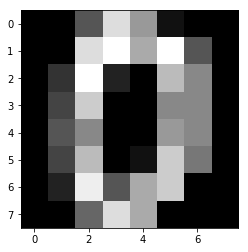

In [32]:
import matplotlib.pyplot as plt

plt.imshow(digits.images[0],cmap='gray')
plt.show()

In [33]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [34]:
# 标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)
# 输入数据归一化
# X -= X.min()
# X /= X.max()

nm = NeuralNetwork([64,100,10])#创建网络

X_train,X_test,y_train,y_test = train_test_split(X,y) #分割数据1/4为测试数据，3/4为训练数据

labels_train = LabelBinarizer().fit_transform(y_train)#标签二值化     0,8,6   0->1000000000  3->0001000000
labels_test = LabelBinarizer().fit_transform(y_test)#标签二值化

print('start')

nm.train(X_train,labels_train,epochs=20000)

print('end')

start
epoch: 0 accuracy: 0.0977777777778
epoch: 1000 accuracy: 0.764444444444
epoch: 2000 accuracy: 0.848888888889
epoch: 3000 accuracy: 0.868888888889
epoch: 4000 accuracy: 0.935555555556
epoch: 5000 accuracy: 0.946666666667
epoch: 6000 accuracy: 0.957777777778
epoch: 7000 accuracy: 0.955555555556
epoch: 8000 accuracy: 0.968888888889
epoch: 9000 accuracy: 0.962222222222
epoch: 10000 accuracy: 0.966666666667
epoch: 11000 accuracy: 0.968888888889
epoch: 12000 accuracy: 0.973333333333
epoch: 13000 accuracy: 0.973333333333
epoch: 14000 accuracy: 0.977777777778
epoch: 15000 accuracy: 0.977777777778
epoch: 16000 accuracy: 0.975555555556
epoch: 17000 accuracy: 0.977777777778
epoch: 18000 accuracy: 0.975555555556
epoch: 19000 accuracy: 0.977777777778
epoch: 20000 accuracy: 0.977777777778
end
